In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

# Discrete HMM

In [83]:
import numpy as np
from hmmlearn import hmm

states = ["Rainy", "Sunny"]
n_states = len(states)

vocabulary = ["walk", "shop", "clean"]
n_vocabulary = len(vocabulary)

start_probability = np.array([0.6, 0.4])

transition_probability = np.array([
  [0.7, 0.3],
  [0.10, 0.90]
])

emission_probability = np.array([
  [0.1, 0.4, 0.5],
  [0.6, 0.3, 0.1]
])

In [84]:
model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
model

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=2,
        n_iter=10, params='ste', random_state=None, startprob_prior=1.0,
        tol=0.01, transmat_prior=1.0, verbose=False)

In [85]:
observed_sequence = ["walk", "clean", "shop", "clean", "clean", "walk", "shop", "clean", "walk", "walk", "shop", "walk", "walk", "clean","walk","shop"]

In [86]:
X = np.array([[vocabulary.index(o)] for o in observed_sequence])
X

array([[0],
       [2],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [2],
       [0],
       [1]])

In [87]:
# predict a sequence of hidden states based on visible states

logprob, path = model.decode(X, algorithm="viterbi")
print("Observed sequence:", ", ".join(observed_sequence))
print("Most probable path:", ", ".join(map(lambda x: states[x], path)))

Observed sequence: walk, clean, shop, clean, clean, walk, shop, clean, walk, walk, shop, walk, walk, clean, walk, shop
Most probable path: Rainy, Rainy, Rainy, Rainy, Rainy, Sunny, Sunny, Sunny, Sunny, Sunny, Sunny, Sunny, Sunny, Sunny, Sunny, Sunny


In [88]:
logprob, posteriors = model.score_samples(X)
posteriors = pd.DataFrame(posteriors)
posteriors.columns = states
posteriors.index = observed_sequence
posteriors.head()

,Rainy,Sunny
walk,0.519657,0.480343
clean,0.791386,0.208614
shop,0.801730,0.198270
clean,0.865639,0.134361
clean,0.773105,0.226895


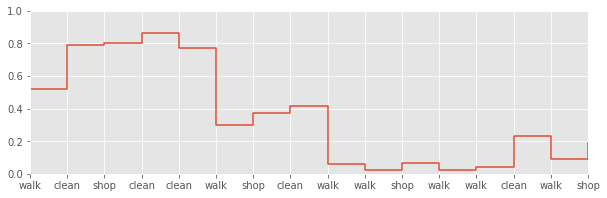

In [89]:
ax = posteriors['Rainy'].plot(figsize=(10,3), drawstyle='steps-post', xticks=range(0,len(posteriors)), ylim=(0,1))


# Gaussian mixture HMM

In [ ]:
emission_probability = np.array([
  [0.1, 0.4, 0.5],
  [0.6, 0.3, 0.1]
])

In [ ]:
model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
model